In [16]:
import pandas as pd
import seaborn as sns

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer  
stop_words = stopwords.words('english')

import re

from sklearn.naive_bayes import MultinomialNB

import numpy as np
import matplotlib.pyplot as plt
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import nltk
import string

In [2]:
data = pd.read_csv("data.csv")
data

,Unnamed: 0,targetCategory,post,y
0,0,race,RT @iBeZo: Stupid fucking nigger LeBron. You f...,1
1,1,race,I need a girl from Jamaica I can't fuck with t...,1
2,2,gender,Molly make bitches crazy,2
3,3,race,This niggga said I be branding bitches &#12856...,1
4,4,race,It's funny when u get a black female mad they ...,1
...,...,...,...,...
12075,12075,gender,Does anyone else have the suspicion that moder...,2
12076,12076,disabled,We need World War III\nThen all Chads and Norm...,5
12077,12077,gender,Roasties can look like this and STILL be consi...,2
12078,12078,social,Help me find a video\nI'm looking for a video ...,6


In [3]:
X = data.iloc[:, [2,1]]
X

,post,targetCategory
0,RT @iBeZo: Stupid fucking nigger LeBron. You f...,race
1,I need a girl from Jamaica I can't fuck with t...,race
2,Molly make bitches crazy,gender
3,This niggga said I be branding bitches &#12856...,race
4,It's funny when u get a black female mad they ...,race
...,...,...
12075,Does anyone else have the suspicion that moder...,gender
12076,We need World War III\nThen all Chads and Norm...,disabled
12077,Roasties can look like this and STILL be consi...,gender
12078,Help me find a video\nI'm looking for a video ...,social


In [4]:
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()



def cleantext(text):
    text= text.lower()
    text= re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)
    text= re.sub(r"http\S+", "",text)
    text= re.sub(r"http", "",text)
    
    punctuations= '@#!?+&*[]-%.:/();$=><|{}^' + "'`" + '_'
    for p in punctuations:
        text= text.replace(p, '')
        
    text= [word.lower() for word in text.split() if word.lower() not in sw]
    
    text= [lemmatizer.lemmatize(word) for word in text]
    
    text = " ".join(text)
    
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text= emoji_pattern.sub(r'',text)
    
    return text

In [5]:
import nltk

In [6]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/arthur/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
X['post'] = X['post'].apply(lambda x: cleantext(x))
 
X.head() 

<ipython-input-7-b1fd811f9254>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['post'] = X['post'].apply(lambda x: cleantext(x))


,post,targetCategory
0,rt ibezo stupid fucking nigger lebron flopping...,race
1,need girl jamaica fuck basic black bitch,race
2,molly make bitch crazy,gender
3,niggga said branding bitch,race
4,funny u get black female mad start acting ghet...,race


In [8]:
from sklearn.preprocessing import LabelEncoder# Initialize the Label Encoder.
le = LabelEncoder()

# Encode the categories
X['TargetCategory_enc'] = le.fit_transform(data['targetCategory'])

# Display the first five rows again to see the result
display(X.head())

# Print the datatypes
print(X.dtypes)

<ipython-input-8-6a7a233d6453>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TargetCategory_enc'] = le.fit_transform(data['targetCategory'])


,post,targetCategory,TargetCategory_enc
0,rt ibezo stupid fucking nigger lebron flopping...,race,4
1,need girl jamaica fuck basic black bitch,race,4
2,molly make bitch crazy,gender,3
3,niggga said branding bitch,race,4
4,funny u get black female mad start acting ghet...,race,4


post                  object
targetCategory        object
TargetCategory_enc     int64
dtype: object


In [9]:
from sklearn.model_selection import train_test_split

A = X.post
y = X.targetCategory

X_train, X_test, y_train, y_test = train_test_split(A, y, test_size=0.2, random_state = 42)

## tfidf + naive bayesian

In [10]:
m = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [11]:
m.fit(X_train, y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [12]:
y_pred_em = m.predict(X_test)
y_pred_em

array(['race', 'gender', 'race', ..., 'gender', 'culture', 'race'],
      dtype='<U8')

In [13]:
confusionmat_embeded = confusion_matrix(y_test, y_pred_em)
confusionmat_embeded

array([[  0,   3,   0,  43,  27,   0,   6],
       [  0, 227,   0,  44, 146,   0,   6],
       [  0,   7,  12,  57,  82,   0,   1],
       [  0,   1,   0, 557,  62,   0,   2],
       [  0,  18,   0,  51, 631,   0,   4],
       [  0,  10,   0,  53,  52,   1,   1],
       [  0,  28,   0, 113, 113,   0,  58]])

In [18]:
accuracy = accuracy_score(y_test, y_pred_em)
microaveraged_F1_score = f1_score(y_test, y_pred_em, average='micro')
macroaveraged_F1_score = f1_score(y_test, y_pred_em, average='macro')
print("Architecture 1 accuracy:", accuracy)
print("Architecture 1 microaveraged F1 score:", microaveraged_F1_score)
print("Architecture 1 macroaveraged F1 score:", macroaveraged_F1_score)

Architecture 1 accuracy: 0.6150662251655629
Architecture 1 microaveraged F1 score: 0.6150662251655629
Architecture 1 macroaveraged F1 score: 0.3579796960450362


## golve + mlp

In [17]:
sw_set=stopwords.words('english')+list(string.punctuation)

In [18]:
glove_file = datapath('/Users/arthur/Desktop/1_learning/nlp/project/glove.6B.100d.txt')
word2vec_text_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_text_file)

<ipython-input-18-d146e412ce6d>:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_text_file)


(400001, 100)

In [19]:
model_em = KeyedVectors.load_word2vec_format(word2vec_text_file)

In [20]:
## use my impelementation of calc_doc_embedding
OOV_embed = dict()
def calc_doc_embedding(doc, model, embed_size, OOV_embed):
    
    words = doc.split(" ")
    doc_embed = np.zeros(embed_size)
    for word in words:
        if word not in stopset:
            try: 
                embed = model.get_vector(word)
            except:
                try:
                    embed = OOV_embed[word]
                except:
                    embed = np.random.rand(embed_size)
                    OOV_embed[word] = embed
                    
            doc_embed += embed
    
    doc_embed = doc_embed/(len(words))
        
    
    return doc_embed

nltk.download('stopwords')
stopset = stopwords.words('english') + list(string.punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arthur/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
import numpy as np
X_train_embeded = np.vstack([calc_doc_embedding(d, model_em, 100, OOV_embed) for d in X_train])
X_test_embeded = np.vstack([calc_doc_embedding(d, model_em, 100, OOV_embed) for d in X_test])

In [22]:
neural_model = MLPClassifier(hidden_layer_sizes=(88,64,59,22),verbose=True)
neural_model.fit(X_train_embeded, y_train)

Iteration 1, loss = 1.63840036
Iteration 2, loss = 1.28714485
Iteration 3, loss = 1.17980140
Iteration 4, loss = 1.12395824
Iteration 5, loss = 1.06835989
Iteration 6, loss = 1.03392986
Iteration 7, loss = 1.00511514
Iteration 8, loss = 0.98341453
Iteration 9, loss = 0.96202592
Iteration 10, loss = 0.94039643
Iteration 11, loss = 0.92239795
Iteration 12, loss = 0.89397378
Iteration 13, loss = 0.87745803
Iteration 14, loss = 0.86242547
Iteration 15, loss = 0.84947542
Iteration 16, loss = 0.82631882
Iteration 17, loss = 0.81991374
Iteration 18, loss = 0.80550167
Iteration 19, loss = 0.79334702
Iteration 20, loss = 0.78018672
Iteration 21, loss = 0.76558464
Iteration 22, loss = 0.75186563
Iteration 23, loss = 0.74043357
Iteration 24, loss = 0.72536596
Iteration 25, loss = 0.71289635
Iteration 26, loss = 0.70530896
Iteration 27, loss = 0.69088091
Iteration 28, loss = 0.68281532
Iteration 29, loss = 0.67155434
Iteration 30, loss = 0.67070685
Iteration 31, loss = 0.66192817
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(88, 64, 59, 22), verbose=True)

In [27]:
y_pred_em = neural_model.predict(X_test_embeded)
y_pred_em

array(['social', 'victim', 'disabled', ..., 'gender', 'gender', 'race'],
      dtype='<U8')

In [28]:
confusionmat_embeded = confusion_matrix(y_test, y_pred_em)
confusionmat_embeded

array([[  9,   5,   6,  26,  14,   1,  18],
       [  3, 290,   6,  27,  52,  11,  34],
       [ 11,   8,  70,  22,  18,   7,  23],
       [ 12,  28,  15, 405,  84,  23,  55],
       [  7,  71,  13,  57, 512,  24,  20],
       [  2,  17,   3,  26,  18,  45,   6],
       [ 19,  52,  17,  62,  37,   8, 117]])

Text(0.5, 1.0, 'Embedded confusion matrix')

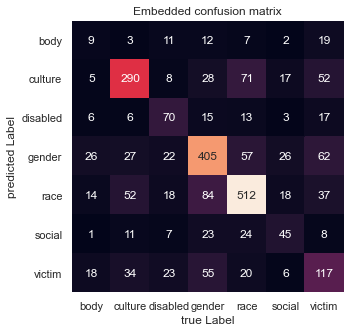

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
plt.figure(figsize=(5,5))

sns.heatmap(confusionmat_embeded.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

plt.xlabel('true Label')
plt.ylabel('predicted Label')
plt.title('Embedded confusion matrix')

In [30]:
microaveraged_F1_score = f1_score(y_test, y_pred_em, average='micro')
macroaveraged_F1_score = f1_score(y_test, y_pred_em, average='macro')
print("Architecture 2 microaveraged F1 score:", microaveraged_F1_score)
print("Architecture 2 macroaveraged F1 score:", macroaveraged_F1_score)

Architecture 2 microaveraged F1 score: 0.5993377483443708
Architecture 2 macroaveraged F1 score: 0.48606847988237695
